In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./boston.csv.bz2', '\t')

In [4]:
data.shape

(506, 14)

There are 506 observations of 14 features

In [5]:
data.count()

crim       506
zn         506
indus      506
chas       506
nox        506
rm         506
age        506
dis        506
rad        506
tax        506
ptratio    506
black      506
lstat      506
medv       506
dtype: int64

There are no missing values in this data as the number of non-null values is equal to the total number of observations for each feature

In [6]:
import statsmodels.formula.api as smf

## RM

In [8]:
r = smf.ols(formula = 'medv ~ rm', data=data).fit()

In [9]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           2.49e-74
Time:                        11:40:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = -34.6706

This coefficient indicates the starting value of a house, if it had 0 rooms. It is statistically significant due to the P value of 0, indicating that there is almost no chance this value would occur due to chance.

B1 = 9.1021

This coefficient indicates that for every additional room in a house, the value of the house increases by 9.1021. It is statistically significant since the p value is 0, meaning there is almost no chance this value could occur purely due to chance.

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

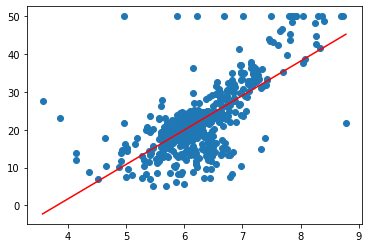

In [12]:
plt.scatter(data.rm, data.medv)
ax = np.linspace(data['rm'].min(), data['rm'].max())
hatRM = r.params[0] + r.params[1] * ax
plt.plot(ax, hatRM, color='red')
plt.show()

This line is upward sloping, indicating a positive relationship between the number of rooms in a house and its value. This relationship is visible in the dots as well, but the correlation coefficient would be a little lower than 1 (not a perfect correlation). This is supported by the r-squared value of 0.484.

## NOX

In [13]:
r = smf.ols(formula = 'medv ~ nox', data=data).fit()

In [14]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           7.07e-24
Time:                        11:48:13   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.000      37.787      44.904
nox          -33.9161      3.196    -10.611      0.000     -40.196     -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = 41.35

This means that with a nitrogen oxide concentration of 0, the house value would be 41.35. This is statisically significant because the p value is 0.

B1 = -33.92

This means that for every additional unit of nitrogen oxide concentration, the house value decreases by 33.92. This is statistically significant because the p value is 0

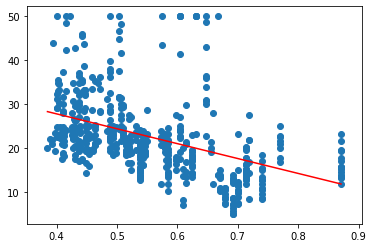

In [16]:
plt.scatter(data.nox, data.medv)
ax = np.linspace(data['nox'].min(), data['nox'].max())
hatNOX = r.params[0] + r.params[1] * ax
plt.plot(ax, hatNOX, color='red')
plt.show()

This line is downward sloping, indicating that there is a negative relationship between nitrogen oxide concentration and house value. This relationship is less obvious in the dots as there is a weak correlation. This is supported by the low r-squared value.

In [22]:
def regData(var):
    r = smf.ols(formula = 'medv ~ ' + var, data=data).fit()
    return r

In [18]:
def plotReg(var):
    plt.scatter(data['' + var], data.medv)
    ax = np.linspace(data['' + var].min(), data['' + var].max())
    hat = r.params[0] + r.params[1] * ax
    plt.plot(ax, hat, color='red')
    return plt

## LSTAT

In [26]:
r = regData('lstat')
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        12:04:03   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = 34.55

This means that with the lower status of the population being 0%, the house value is 34.55. This is statistically significant because the p value is 0.

B1 = -0.95

This means that with every additional percentage of the lower status of the population, the house value decreases by 0.95. This is statistically significant because the p value is 0.

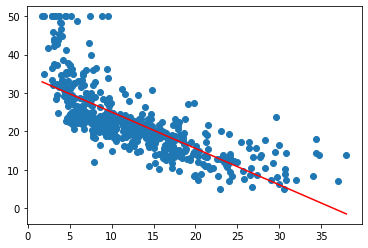

In [27]:
plotReg('lstat')

This line is sloping downwards, indicating there is a negative relationship between the lower status of the population and house value. This relationship is also evident in the dots, indicating a strong negative correlation. This is also supported by the r-squared value of 0.544.

## AGE

In [29]:
r = regData('age')
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           1.57e-18
Time:                        12:05:35   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = 30.98

This means that if none of the owner occupied units were built prior to 1940, the house value would be 30.98. This is statistically significant because the p value is 0

B1 = -0.12

This means that for every additional unit in the proportion of owner occupied units built prior to 1940, the house value decreases by 0.12. This is statistically significant because the p-value is 0.

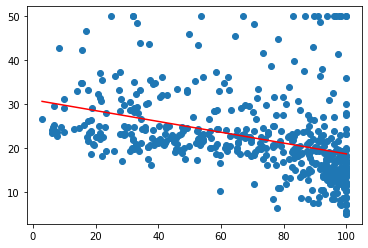

In [30]:
plotReg('age')

This line is downward sloping, indicating a negative relationship between proportion of owner occupied units built prior to 1940 and house value. This relationship is only slightly noticable in the dots, indicating a weak negative correlation. This is also reflected by the low r-squared value.

## INDUS

In [34]:
r = regData('indus')
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           4.90e-31
Time:                        12:13:18   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3550.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7549      0.683     43.537      0.000      28.412      31.098
indus         -0.6485      0.052    -12.408      0.000      -0.751      -0.546
==============================================================================
Omnibus:                      178.432   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.993
Skew:                           1.672   Prob(JB):                    5.59e-123
Kurtosis:                       6.939   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0 = 29.75

This means that if the proportion of non-retail business acres is 0, then the house value is 29.75. This is statistically significant since the p value is 0.

B1 = -0.65

This means that for every additional unit of proportion of non-retail business acres, the house value decreases by -0.65. This is statistically significant since the p value is 0.

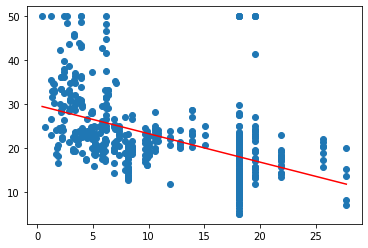

In [35]:
plotReg('indus')

This line appears to be downward sloping, indicating that there is a negative relationship between the proportion of non-retail business acres and the house value. This relationship is not very noticable in the dots, indicating that there is a weak negative correlation. This is also reflected by the low r-squared value.